<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Для начала импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

Прочтём все файлы и сохраним их в переменных.

In [2]:
try:
    test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
    train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

Сохраним все три датафрейма

In [3]:
datasets = [df, train, test]

Выведем общую информацию о таблицах.

In [4]:
for data in datasets:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Таблицы довольно большие, в них 86 столбцов, а в обучающей - 52. Эта разница сильно заметна. Из документации к данным мы знаем, что 

Rougher feed — исходное сырье
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
Xanthate — ксантогенат (промотер, или активатор флотации);
Sulphate — сульфат (на данном производстве сульфид натрия);
Depressant — депрессант (силикат натрия).
Rougher process (англ. «грубый процесс») — флотация
Rougher tails — отвальные хвосты
Float banks — флотационная установка
Cleaner process — очистка
Rougher Au — черновой концентрат золота
Final Au — финальный концентрат золота


air amount — объём воздуха
fluid levels — уровень жидкости
feed size — размер гранул сырья
feed rate — скорость подачи


rougher — флотация
primary_cleaner — первичная очистка
secondary_cleaner — вторичная очистка
final — финальные характеристики


input — параметры сырья
output — параметры продукта
state — параметры, характеризующие текущее состояние этапа
calculation — расчётные характеристики

Проверим данные на наличие дубликатов

In [5]:
for data in datasets:
    print(data.duplicated().sum())

0
0
0


Дубликаты отсутствуют.

Выведем первые пять строк таблиц на экран

In [6]:
for data in datasets:
    display(data)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


Проверим количество пропусков в датасетах

In [7]:
for data in datasets:
    print(data.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.f

Пропуски встречаются во всех таблицах в различных столбцах. Посмотрим сколько процентов данных пропущено

In [8]:
def print_na_percent(data):
    print(data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100)

In [9]:
for data in datasets:
    print_na_percent(data)

secondary_cleaner.output.tail_sol           8.992232
rougher.input.floatbank11_xanthate          2.330367
rougher.state.floatbank10_e_air             2.242914
primary_cleaner.output.concentrate_sol      1.903390
secondary_cleaner.state.floatbank2_a_air    1.131745
                                              ...   
rougher.state.floatbank10_d_level           0.000000
rougher.state.floatbank10_d_air             0.000000
rougher.output.tail_pb                      0.000000
rougher.output.tail_sol                     0.000000
date                                        0.000000
Length: 87, dtype: float64
secondary_cleaner.output.tail_sol           11.343558
rougher.state.floatbank10_e_air              3.081490
rougher.input.floatbank11_xanthate           3.024949
primary_cleaner.output.concentrate_sol       2.021344
secondary_cleaner.state.floatbank2_a_air     1.533677
                                              ...    
rougher.output.concentrate_pb                0.000000
rougher.outp

В задании сказано, что соседние по времени параметры часто похожи, поэтому заполним пропуски, используя соседние значения.

In [10]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

print('В train есть пропуски: ', train.isnull().values.any())
print('В test есть пропуски: ', test.isnull().values.any())

В train есть пропуски:  False
В test есть пропуски:  False


Теперь пропусков нет.

Найдём столбцы, которые есть в тренировочной выборке, но нет в тестовой

In [11]:
def fields_diff(first_df, second_df):
    return set(first_df.columns.to_list()) - set(second_df.columns.to_list())

In [12]:
missing_test_fields = fields_diff(train, test)
print(train[missing_test_fields].dtypes)

primary_cleaner.output.tail_au                        float64
rougher.output.tail_sol                               float64
final.output.tail_sol                                 float64
secondary_cleaner.output.tail_pb                      float64
rougher.output.tail_au                                float64
final.output.concentrate_sol                          float64
final.output.tail_au                                  float64
final.output.tail_ag                                  float64
secondary_cleaner.output.tail_sol                     float64
secondary_cleaner.output.tail_au                      float64
rougher.calculation.sulfate_to_au_concentrate         float64
final.output.concentrate_pb                           float64
primary_cleaner.output.tail_pb                        float64
rougher.output.concentrate_au                         float64
primary_cleaner.output.tail_ag                        float64
rougher.output.tail_pb                                float64
primary_

В тестовой выборке отсутствуют признаки output - это целевые признаки и поэтому отсутствуют.
Признаки rougher.calculation - это расчетные характеристики и отсутвуют, вероятно, потому что расчитываются после завершения процесса.

Напишем формулу для рассчёта recovery.

In [13]:
def calculate_recovery(rougher_output, rougher_input, rougher_tail):
    recovery = (rougher_output * (rougher_input - rougher_tail)) /\
        (rougher_input * (rougher_output - rougher_tail)) * 100
    
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    return recovery

In [14]:
recovery = calculate_recovery(
    train['rougher.output.concentrate_au'], 
    train['rougher.input.feed_au'], 
    train['rougher.output.tail_au'],
)
print(recovery.describe())

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64


In [15]:
mae_recovery = mean_absolute_error(train['rougher.output.recovery'].dropna(), recovery.dropna())
print('MAE =', mae_recovery)

MAE = 9.73512347450521e-15


Оценим размер каждой выборки.

In [16]:
for data in datasets:
    print(data.shape)

(19439, 87)
(14149, 87)
(5290, 53)


## Анализ данных

Распределение концентрации металлов на различных ступенях обработки

In [17]:
def show_concentrate_of_metal_hist(metal, title):
    x0 = df[f'rougher.input.feed_{metal}'].dropna()
    x1 = df[f'rougher.output.concentrate_{metal}'].dropna()
    x2 = df[f'primary_cleaner.output.concentrate_{metal}'].dropna()
    x3 = df[f'final.output.concentrate_{metal}'].dropna()

    plt.figure(figsize=(15, 10))

    sns.distplot(x0, kde_kws= {"label": "Сырье"})
    sns.distplot(x1, kde_kws= {"label": "Черновой"})
    sns.distplot(x2, kde_kws= {"label": "Первичная очистка"})
    sns.distplot(x3, kde_kws= {"label": "Финальный этап"})

    plt.title(label=f'Концентрация {title} на различных этапах очистки', fontsize=15)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

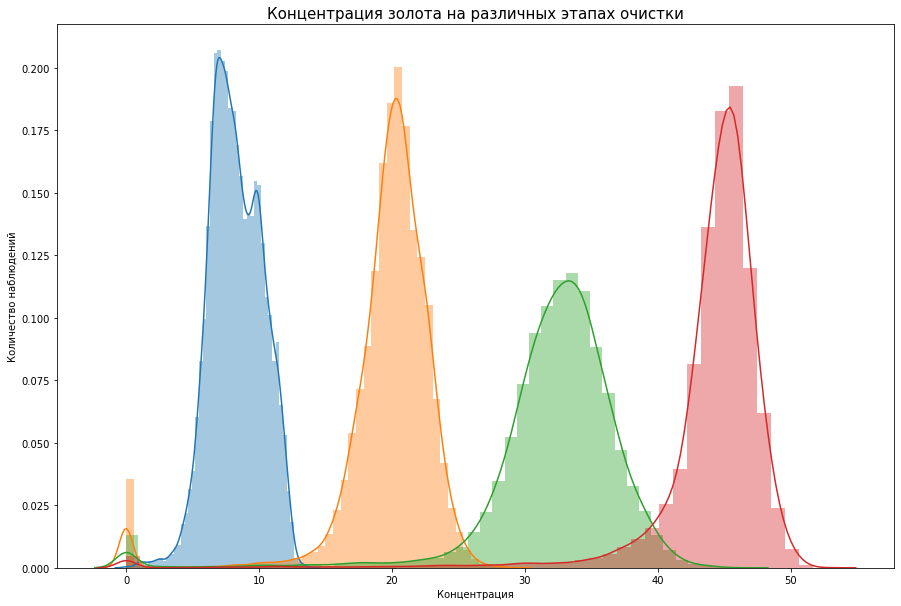

In [18]:
show_concentrate_of_metal_hist('au', 'золота')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

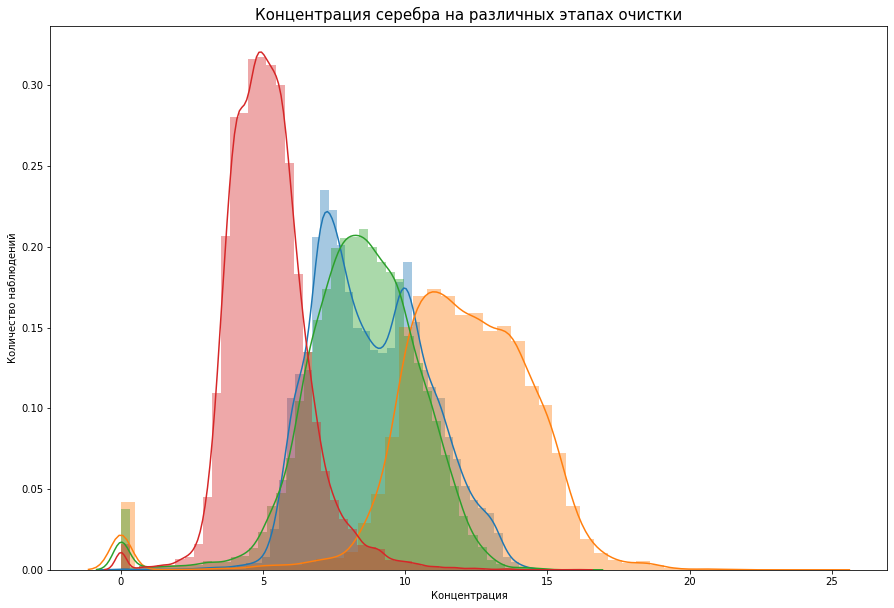

In [19]:
show_concentrate_of_metal_hist('ag', 'серебра')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

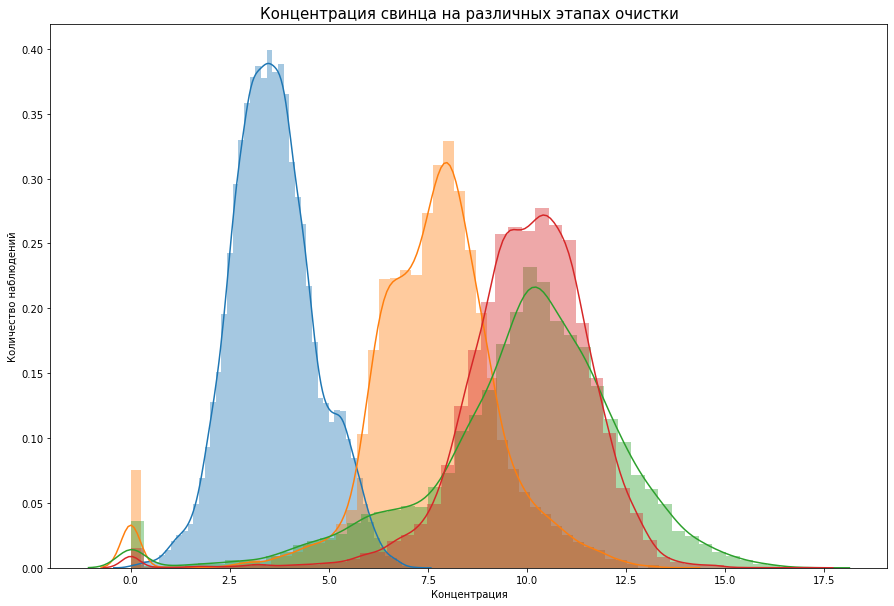

In [20]:
show_concentrate_of_metal_hist('pb', 'свинца')

Не графиках заметно, что концентрация золота увеличивается после каждого этапа очистки, концентрация серебра увеличивается после флотации и уменьшается после следующих этапов, а концентрация свинца снижается после первого этапа очистки и незначительно изменяется в дальнейшем.

Распределения гранул сырья

In [21]:
def show_feed_size_hist(step, title):
    x0 = train[f'{step}.input.feed_size'].dropna()
    x1 = test[f'{step}.input.feed_size'].dropna()
    plt.figure(figsize=(12, 6))
    sns.distplot(x0, kde_kws= {"label": "Train"})
    sns.distplot(x1, kde_kws= {"label": "Test"})
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.title(label=f'Распределение размеров гранул сырья для {title}', fontsize=15)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


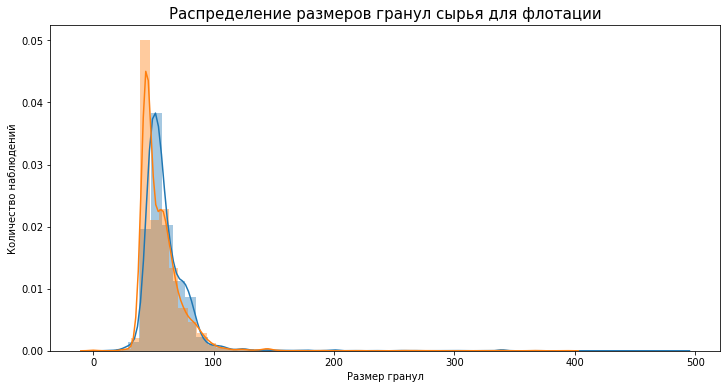

In [22]:
show_feed_size_hist('rougher', 'флотации')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


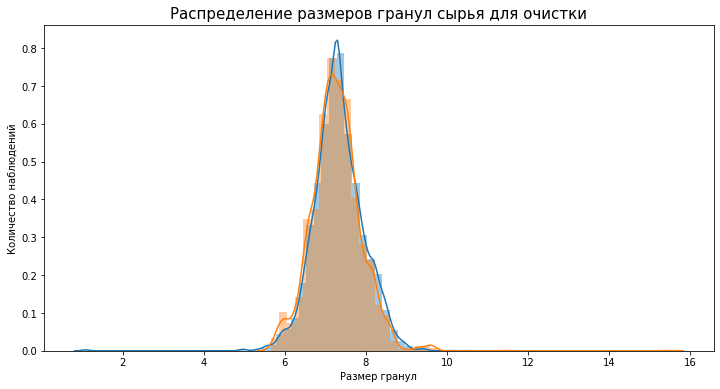

In [23]:
show_feed_size_hist('primary_cleaner', 'очистки')

На графиках заметно, что распределение размеров гранул сырья на обучающей и тестовой выборках имеют небольшие изменения, оценкка модели будет правильной.

Суммарная концентрация всех веществ на разных этапах очистки

In [24]:
metals = ['au', 'ag', 'pb', 'sol']

In [25]:
steps = ['rougher.input.feed_',
         'rougher.output.concentrate_', 
         'final.output.concentrate_']

In [26]:
for step in steps:
    df[step] = df[step + metals[0]] + df[step + metals[1]] + df[step + metals[2]] + df[step + metals[3]]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Концентрация всех веществ на разных стадиях')

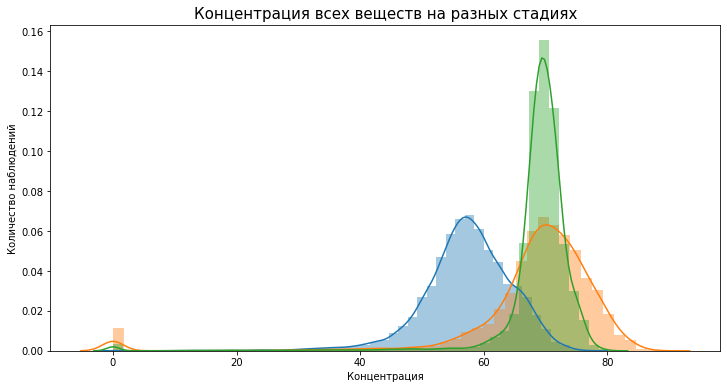

In [27]:
x0 = df['rougher.input.feed_'].dropna()
x1 = df['rougher.output.concentrate_'].dropna()
x2 = df['final.output.concentrate_'].dropna()

plt.figure(figsize=(12, 6))

sns.distplot(x0, kde_kws= {"label": "Сырье"})
sns.distplot(x1, kde_kws= {"label": "Черновой"})
sns.distplot(x2, kde_kws= {"label": "Финальный этап"})


plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.title(label='Концентрация всех веществ на разных стадиях', fontsize=15)

После флотации увеличивается концентрация веществ и далее в ходе очистки сокращается интервал распределения с 50-95 до 60-80. На графике заметны нулевые значения, это выбросы и от них необходимо избавиться.

In [28]:
df = df.drop(index = df[df["rougher.input.feed_au"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["rougher.input.feed_sol"] < 1].index,
                               axis = 0)


df = df.drop(index = df[df["rougher.output.concentrate_au"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["rougher.output.concentrate_ag"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["rougher.output.concentrate_pb"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["rougher.output.concentrate_sol"] < 1].index,
                               axis = 0)


df = df.drop(index = df[df["final.output.concentrate_au"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["final.output.concentrate_ag"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["final.output.concentrate_pb"] < 1].index,
                               axis = 0)
df = df.drop(index = df[df["final.output.concentrate_sol"] < 1].index,
                               axis = 0)

Мы удалили выбросы, построим новый "чистый" график и убедимся, что всё сделали верно.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Концентрация всех веществ на разных стадиях')

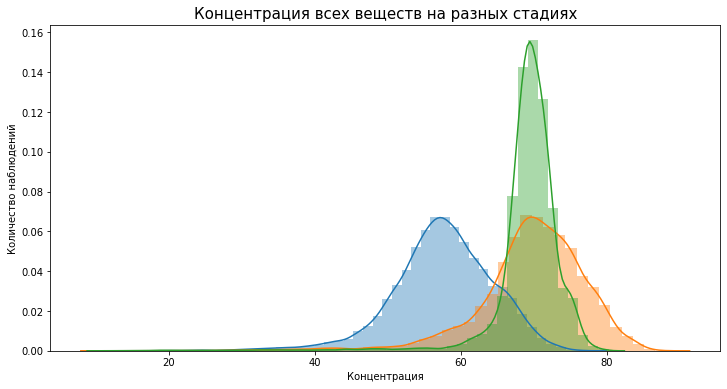

In [29]:
x0 = df['rougher.input.feed_'].dropna()
x1 = df['rougher.output.concentrate_'].dropna()
x2 = df['final.output.concentrate_'].dropna()

plt.figure(figsize=(12, 6))

sns.distplot(x0, kde_kws= {"label": "Сырье"})
sns.distplot(x1, kde_kws= {"label": "Черновой"})
sns.distplot(x2, kde_kws= {"label": "Финальный этап"})


plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.title(label='Концентрация всех веществ на разных стадиях', fontsize=15)

Мы удалили аномалии в данных и сделали их более чистыми. Можем переходить к следующему этапу.

## Модель

Напишем функцию для вычисления итоговой sMAPE.

In [30]:
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 
    
    
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_final, target_predictions_final)

Создадим scorer, чтобы использовать его при кросс-валидации

In [31]:
score = make_scorer(calculate_final_smape, greater_is_better=False)

Перейдём к обучению моделей

In [32]:
df.set_index('date', inplace=True)
test.set_index('date', inplace=True)

In [33]:
y_for_test_final = df[df.index.isin(test.index)]['final.output.recovery']
y_for_test_rougher = df[df.index.isin(test.index)]['rougher.output.recovery']

In [34]:
test = test.join(y_for_test_final)
test = test.join(y_for_test_rougher)

Удалим из train признаки, которых нет в test.

In [35]:
missing_test_fields = fields_diff(train, test)
print(missing_test_fields)
train = train.drop(missing_test_fields, axis='columns')
print(fields_diff(train, test))
print(fields_diff(test, train))

{'primary_cleaner.output.tail_au', 'rougher.output.tail_sol', 'final.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'rougher.output.tail_au', 'final.output.concentrate_sol', 'final.output.tail_au', 'final.output.tail_ag', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'rougher.output.tail_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_ag', 'secondary_cleaner.output.tail_ag', 'rougher.output.concentrate_ag', 'date', 'primary_cleaner.output.tail_sol', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'final.output.tail_pb', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.ca

In [36]:
target_train = train[['rougher.output.recovery', 'final.output.recovery']]
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'],axis = 1)
features_test = test.drop(['rougher.output.recovery', 'final.output.recovery'],axis = 1)

Обучим модель дерева решений.

In [37]:
param_grid = {'max_depth': range(2, 11)}

model = DecisionTreeRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=score)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'
      .format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для дерева решений: 10.952668842678058 при значениях гиперпараметров: {'max_depth': 5}


Обучим модель случайного леса.

In [46]:
param_grid = {'n_estimators': range(10, 31, 10)}

model = RandomForestRegressor(max_depth=3, random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=score)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format
        (-search.best_score_, search.best_params_))

Лучшее значение sMAPE для случайного леса: 10.755625495831492 при значениях гиперпараметров: {'n_estimators': 10}


Обучим модель логистической регрессии.

In [39]:
model = LinearRegression()
model.fit(features_train, target_train)
smape = cross_val_score(model, features_train, target_train, cv=5, scoring=score).mean()
print('Лучшее значение sMAPE для линейной регрессии:', -smape)

Лучшее значение sMAPE для линейной регрессии: 12.384596104847216


Мы видим, что наилучшее значение показала модель случайного леса с глубиной 3 и количеством деревьев 10. Проверим её на тестовой выборке.

In [48]:
model = RandomForestRegressor(max_depth=3, n_estimators=10, random_state=12345) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE для тестовых данных:', calculate_final_smape(target_test, predictions_test))

sMAPE для тестовых данных: 6.661348560755167


Сравним показатель с константной моделью.

In [49]:
base = DummyRegressor(strategy="median")
base_final = DummyRegressor(strategy="median")
base.fit(features_train,target_train)
base_final.fit(features_train, target_train)
base_rougher = base.predict(test)
base_final_pred = base_final.predict(test)

print(calculate_final_smape(target_test, base_final_pred))

7.120002599786014


Показатель smape константной модели немного выше показателя smape тестовых данных. Это хороший результат, значит, наша модель работает верно.

## Вывод

Итак, в ходе выполнения проекта мы выполнили предобработку данных, обучили три разных модели, построили графики, проанализировали признаки, которые отсутствовали в тестовой выборке, посмотрели как меняется концентрация металлов на различных этапах очистки, рассчитали sMAPE для каждой модели.

Самое лучшее значение sMAPE показала модель случайного леса с глубиной 3 и количеством деревьев 10, оно равно 10.7. На тестовой выборке эта модель показала значение sMAPE 6.66. Это хороший результат.